## In this notebook, we will perform EDA on the UCI Breast Cancer dataset
***
The dataset consists of 569 data points. We want to predict if the cancer diagnosis is benign or malignant.
The dataset can be found [here.](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))

* Target class: 
    * Malignant
    * Benign


In [23]:
import pandas as pd
import seaborn as sns

import pickle

In [3]:
cancer_dataset = pd.read_csv('../input/wdbc.data', delimiter=',', encoding='UTF-8',
                     header=None)

In [4]:
cancer_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
cancer_dataset.shape

(569, 32)

* The target variable is not numeric yet, so we need to apply label encoding to get it to a numerical values.
* Also, the first column is id, so even that is not required.
* The remaining features are all numerical in nature, we can apply feature scaling to it.

/home/deb/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


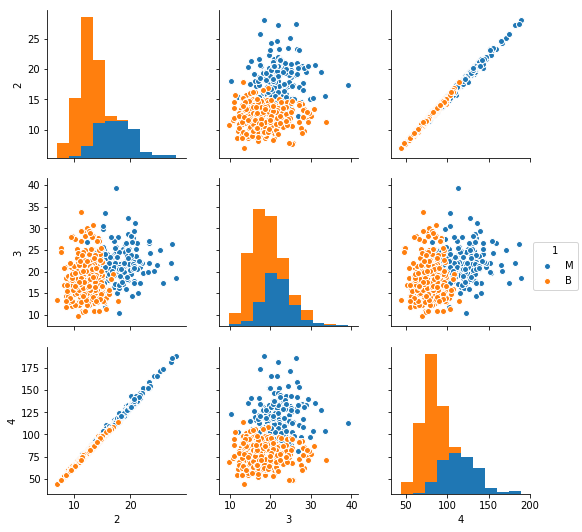

In [6]:
sns.pairplot(data=cancer_dataset, hue=1, vars=[2,3,4])

/home/deb/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


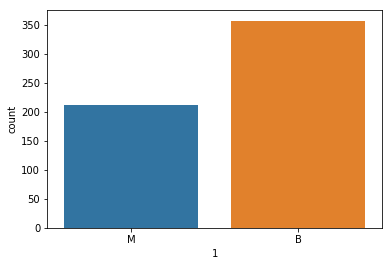

In [7]:
sns.countplot(cancer_dataset[1],label='count')

In [8]:
cancer_dataset.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64')

In [29]:
# shuffle the dataset
cancer_dataset = cancer_dataset.sample(frac=1, random_state=0).reset_index(drop=True)

In [30]:
cancer_dataset.head()

,index,0,1,2,3,4,5,6,7,8,...,22,23,24,25,26,27,28,29,30,31
0,143,869224,B,12.90,15.92,83.74,512.2,0.08677,0.09509,0.04894,...,14.48,21.82,97.17,643.8,0.1312,0.25480,0.20900,0.10120,0.3549,0.08118
1,411,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,...,12.41,26.44,79.93,471.4,0.1369,0.14820,0.10670,0.07431,0.2998,0.07881
2,275,8911164,B,11.89,17.36,76.20,435.6,0.12250,0.07210,0.05929,...,12.40,18.99,79.46,472.4,0.1359,0.08368,0.07153,0.08946,0.2220,0.06033
3,221,8812818,B,13.56,13.90,88.59,561.3,0.10510,0.11920,0.07860,...,14.98,17.13,101.10,686.6,0.1376,0.26980,0.25770,0.09090,0.3065,0.08177
4,127,866203,M,19.00,18.91,123.40,1138.0,0.08217,0.08028,0.09271,...,22.32,25.73,148.20,1538.0,0.1021,0.22640,0.32070,0.12180,0.2841,0.06541


In [33]:
# cancer_dataset[0]

In [17]:
train_set = cancer_dataset[:400]

In [28]:
type(train_set)

pandas.core.frame.DataFrame

In [21]:
test_set = cancer_dataset[400:]

In [22]:
test_set.shape

(169, 33)

In [26]:
# dumping the train and test split of the dataset
with open('../input/train_set.pickle', 'wb') as pickle_handle:
    pickle.dump(train_set, pickle_handle)

In [27]:
with open('../input/test_set.pickle', 'wb') as pickle_handle:
    pickle.dump(test_set, pickle_handle)